train_data=32
train_label=32
tensor([[ -346.5072],
        [ -440.6165],
        [ -550.3773],
        [ -676.9935],
        [ -821.6690],
        [ -985.6078],
        [-1170.0139],
        [-1376.0913]])
train_data=32
train_label=32
test_data=8
preds=8


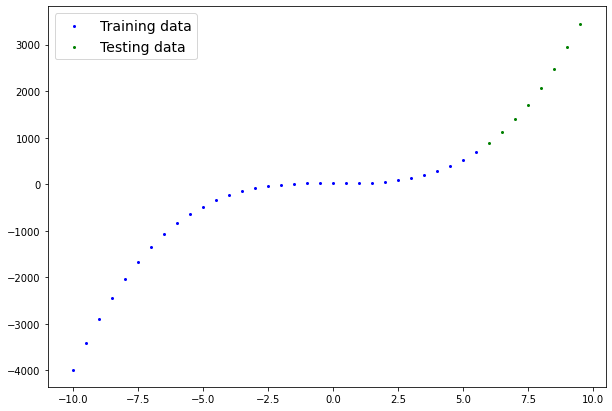

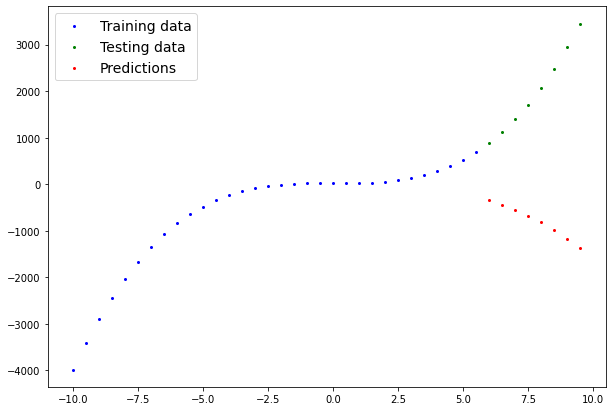

In [108]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Let's create some data of y = a*x^2 + b

a = 4
b = 21

start = -10
end = 10
step = 0.5

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = a*(X**3) + b

# 80% for training
# 20% for testing
train_split = int(0.8*len(y))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

# define a function to plot out results

def plot_results(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, preds=None):
  print(f"train_data={len(train_data)}")
  print(f"train_label={len(train_label)}")
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")
  if(preds is not None):
    print(f"test_data={len(test_data)}")
    print(f"preds={len(preds)}")
    plt.scatter(test_data, preds, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

#plot our training and testing data
plot_results()

#define our model
class CubicModelChristos(nn.Module):
  def __init__(self):
    super().__init__()
    self.a_model = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.b_model = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.a_model*(x**3) + self.b_model

torch.manual_seed(4)

my_cubic_model = CubicModelChristos()

#my_cubic_model.state_dict()

with torch.inference_mode():
  y_preds = my_cubic_model(X_test)
print(y_preds)
# y_preds

#at this point (with random initialization) we receive awful results as we can check in the plots below
plot_results(preds=y_preds)

#Therefore, we have to get things right with the red dots. Quite away from the desired position

#Setting up a loss function
loss_func = nn.L1Loss()

#Setting up an optimizer with Learning Rate = 0.01
my_optimizer = torch.optim.Adam(params=my_cubic_model.parameters(), lr=0.01)


Loss = 1058.0992431640625 at epoch:0
Loss = 963.568115234375 at epoch:50
Loss = 869.0369873046875 at epoch:100
Loss = 774.5057983398438 at epoch:150
Loss = 679.9746704101562 at epoch:200
Loss = 585.4435424804688 at epoch:250
Loss = 491.2011413574219 at epoch:300
Loss = 397.1496276855469 at epoch:350
Loss = 303.0684509277344 at epoch:400
Loss = 209.60003662109375 at epoch:450
Loss = 116.92201232910156 at epoch:500
Loss = 29.341249465942383 at epoch:550
Loss = 16.030141830444336 at epoch:600
Loss = 14.879866600036621 at epoch:650
Loss = 14.040395736694336 at epoch:700
Loss = 13.306722640991211 at epoch:750
Loss = 12.640286445617676 at epoch:800
Loss = 12.013697624206543 at epoch:850
Loss = 11.418743133544922 at epoch:900
Loss = 10.852325439453125 at epoch:950
Loss = 10.301194190979004 at epoch:1000
Loss = 9.774413108825684 at epoch:1050
Loss = 9.247331619262695 at epoch:1100
Loss = 8.737550735473633 at epoch:1150
Loss = 8.23680305480957 at epoch:1200
Loss = 7.746522903442383 at epoch:125

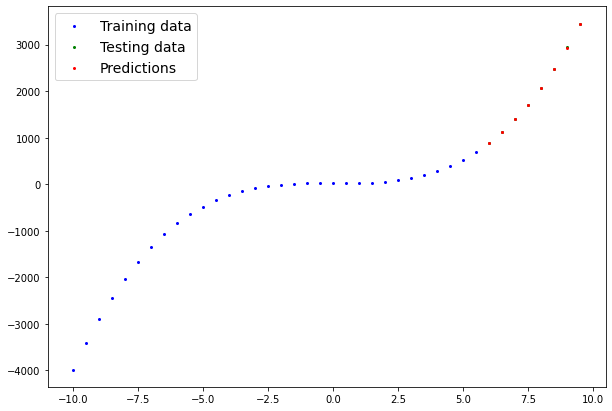

In [109]:
predictions_all = []
epochs = 2000 # 2000 iterations in order to imporve our model's parameters
for epoch in range(epochs):
  my_cubic_model.train()

  y_predictions = my_cubic_model(X_train)
  # predictions_all.append(y_predictions)
  loss = loss_func(y_predictions, y_train)
  #print(f"Loss = {loss} at epoch:{epoch}")
  my_optimizer.zero_grad()
  loss.backward()
  my_optimizer.step()
  if epoch%50==0 or epoch>0.9*epochs:
    predictions_all.append(y_predictions)
    print(f"Loss = {loss} at epoch:{epoch}")

  #print(my_cubic_model.state_dict())

with torch.inference_mode():
  y_final_preds = my_cubic_model(X_test)


plot_results(preds=y_final_preds)
